<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_4_4_exercice_sur_apprentissage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer['data'], columns = cancer["feature_names"])
df["target"]=cancer['target']

Construire des arbres de décision avec des variables de votre choix.


In [ ]:
df.head()

# exemples de variables à prendre en compte

X=df[["mean radius","mean texture","mean perimeter","mean smoothness"]]
y=df["target"]

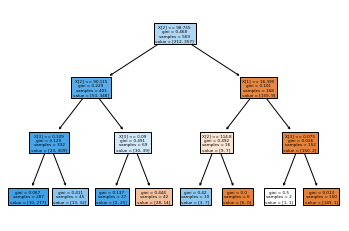

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X,y)
from sklearn.tree import plot_tree
plot_tree(dtc,filled=True,impurity=True)
plt.show()


Split train test



In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
            test_size=0.4, random_state=0)


Utiliser directement la méthode `.score` dans la classe `DecisionTreeClassifier` pour avoir le score du modèle pour la base d'apprentissage et du test.

In [ ]:
print("apprentissage : ", dtc.score(X_train,y_train))
print("test :", dtc.score(X_test,y_test))

apprentissage :  0.9296187683284457
test : 0.9122807017543859


In [ ]:
score_App =[]
score_test =[]
max_dept = []
for i in range(1,100) :
  dtc = DecisionTreeClassifier(max_depth=i)
  dtc.fit(X,y)
  from sklearn import model_selection
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
            test_size=0.4, random_state=0)
  score_App.append(dtc.score(X_train,y_train))
  score_test.append(dtc.score(X_test,y_test))
  max_dept.append(i)
df_scores = pd.DataFrame({"apprentissage":score_App,"test":score_test,"depth":max_dept})


In [ ]:
df_scores

,apprentissage,test,depth
0,0.016949,0.025,1
1,0.016949,0.050,2
2,0.033898,0.050,3
3,0.050847,0.050,4
4,0.050847,0.075,5
...,...,...,...
94,0.050847,0.125,95
95,0.050847,0.125,96
96,0.050847,0.125,97
97,0.050847,0.125,98


Utiliser une boucle `for` pour tester différentes valeurs de `max_depth` dans `DecisionTreeClassifier`, et stocker les scores pour la base d'apprentissage et de test.

Créer un graphique pour visualiser l'évolution des erreurs (ou scores) d'apprentissage et du test en fonction de `max_depth`

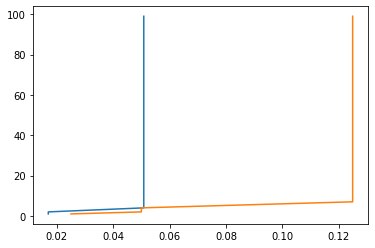

In [ ]:
X = df_scores[['apprentissage','test']]
y=df_scores[['depth']]

import matplotlib.pyplot as plt

plt.plot(X,y)
plt.xlabel='Score'
plt.ylabel='Depth'
plt.show()
# la légende ne s'affiche pas correctement je ne sais pas pourquoi ?